# About project

In this project we want to make the recommendation system based on user preferences.

# Dataset description

Target_feature: Rating

Features: Category, Price

## Read Dataset

In [45]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

df = pd.read_csv('data/tourism_with_id.csv')

In [46]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [47]:
# Remove unused column
df = df.drop(['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'], axis=1)
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5


In [48]:
# Because we only want to build recommendation system only in Yogyakrta city, we need to filter the data so that it only contains data from Yogyakarta city.

df = df[df['City'] == 'Yogyakarta']
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 84 to 209
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     126 non-null    int64  
 1   Place_Name   126 non-null    object 
 2   Description  126 non-null    object 
 3   Category     126 non-null    object 
 4   City         126 non-null    object 
 5   Price        126 non-null    int64  
 6   Rating       126 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 7.9+ KB


In [50]:
# see missing value in data
df.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Price          0
Rating         0
dtype: int64

In [51]:
# see Place_Name data 

df['Place_Name'].unique()

array(['Taman Pintar Yogyakarta', 'Keraton Yogyakarta',
       'Sindu Kusuma Edupark (SKE)',
       'Museum Benteng Vredeburg Yogyakarta', 'De Mata Museum Jogja',
       'Kampung Wisata Taman Sari', 'Situs Warungboto',
       'Nol Kilometer Jl.Malioboro', 'Gembira Loka Zoo', 'Sumur Gumuling',
       'Desa Wisata Sungai Code Jogja Kota',
       'Alun Alun Selatan Yogyakarta', 'Monumen Yogya Kembali',
       'Taman Pelangi Yogyakarta', 'Kampung Wisata Kadipaten',
       'Taman Budaya Yogyakarta', 'Kampung Wisata Sosro Menduran',
       'Monumen Batik Yogyakarta', 'Tugu Pal Putih Jogja',
       'Tebing Breksi', 'Candi Donotirto', 'Kawasan Malioboro',
       'Bangsal Pagelaran', 'Embung Tambakboyo', 'Hutan Pinus Pengger',
       'Monumen Serangan Umum 1 Maret', 'Puncak Pinus Becici',
       'Bukit Bintang Yogyakarta', 'Gedung Agung Yogyakarta',
       'The Lost World Castle', 'Monumen Sanapati',
       'Jurang Tembelan Kanigoro',
       'The World Landmarks - Merapi Park Yogyakarta',
     

In [52]:
# see how many unique value in Place_Name data

print("There is {} unique place in Yogyakarta city.".format(len(df['Place_Name'].unique())))

There is 126 unique place in Yogyakarta city.


In [53]:
# see category data

df['Category'].unique()

array(['Taman Hiburan', 'Budaya', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan'], dtype=object)

In [54]:
# see price data

df['Price'].unique()

array([  6000,  15000,  20000,   3000,  50000,   5000,      0,  60000,
         7000,  40000,  25000,  30000,   2500,  22000, 250000,   4000,
        10000,   2000, 500000, 220000, 100000,  75000, 150000,   8000])

## Exploratory Data Analysis

/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Intro to Tensorflow/cs23-ps297/env_capstone/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


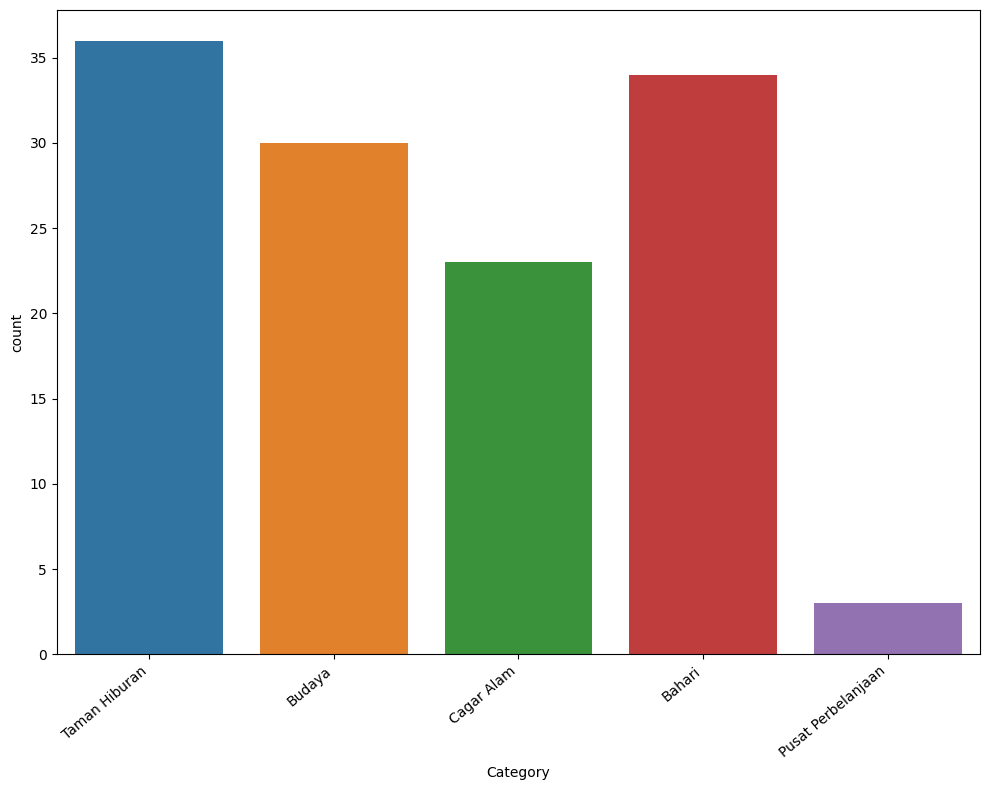

In [55]:
# using bar chart to see the number of place in each category

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
ax = sns.countplot(df['Category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Intro to Tensorflow/cs23-ps297/env_capstone/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


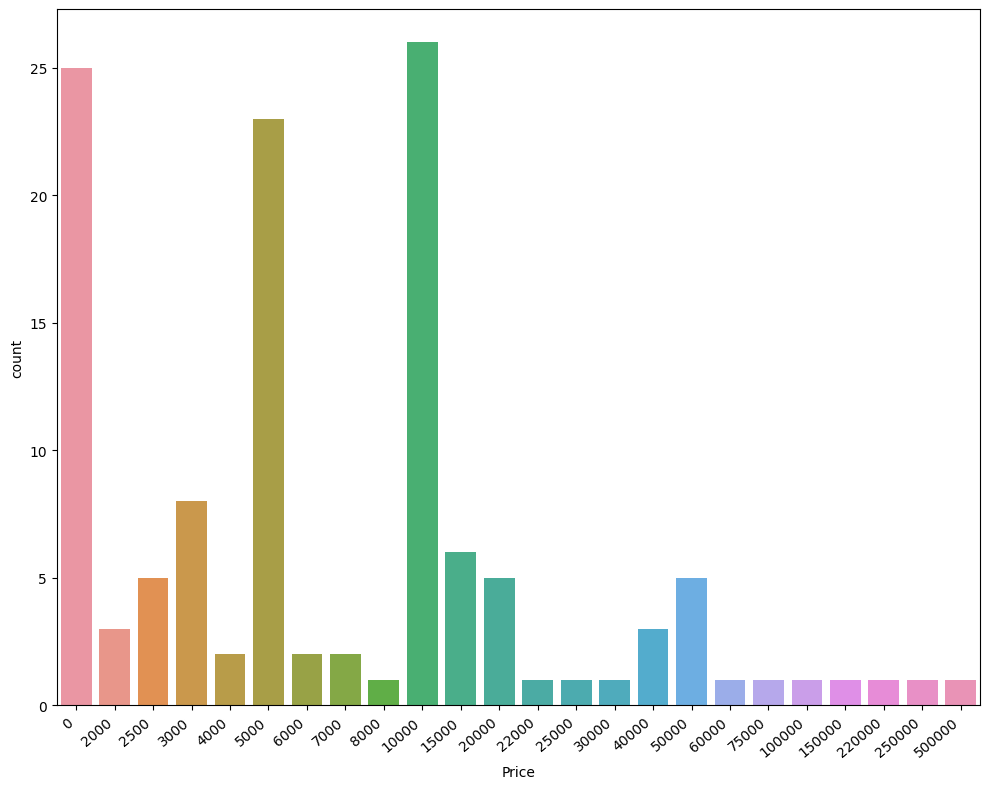

In [56]:
# Using bar chart to see the number of place in each price

plt.figure(figsize=(10, 8))
ax = sns.countplot(df['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



/media/abdulhafidh/New Volume/Syiah Kuala University/Computer Science/6th Semester (23 SKS)/Bangkit 2023 (20 SKS)/Intro to Tensorflow/cs23-ps297/env_capstone/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


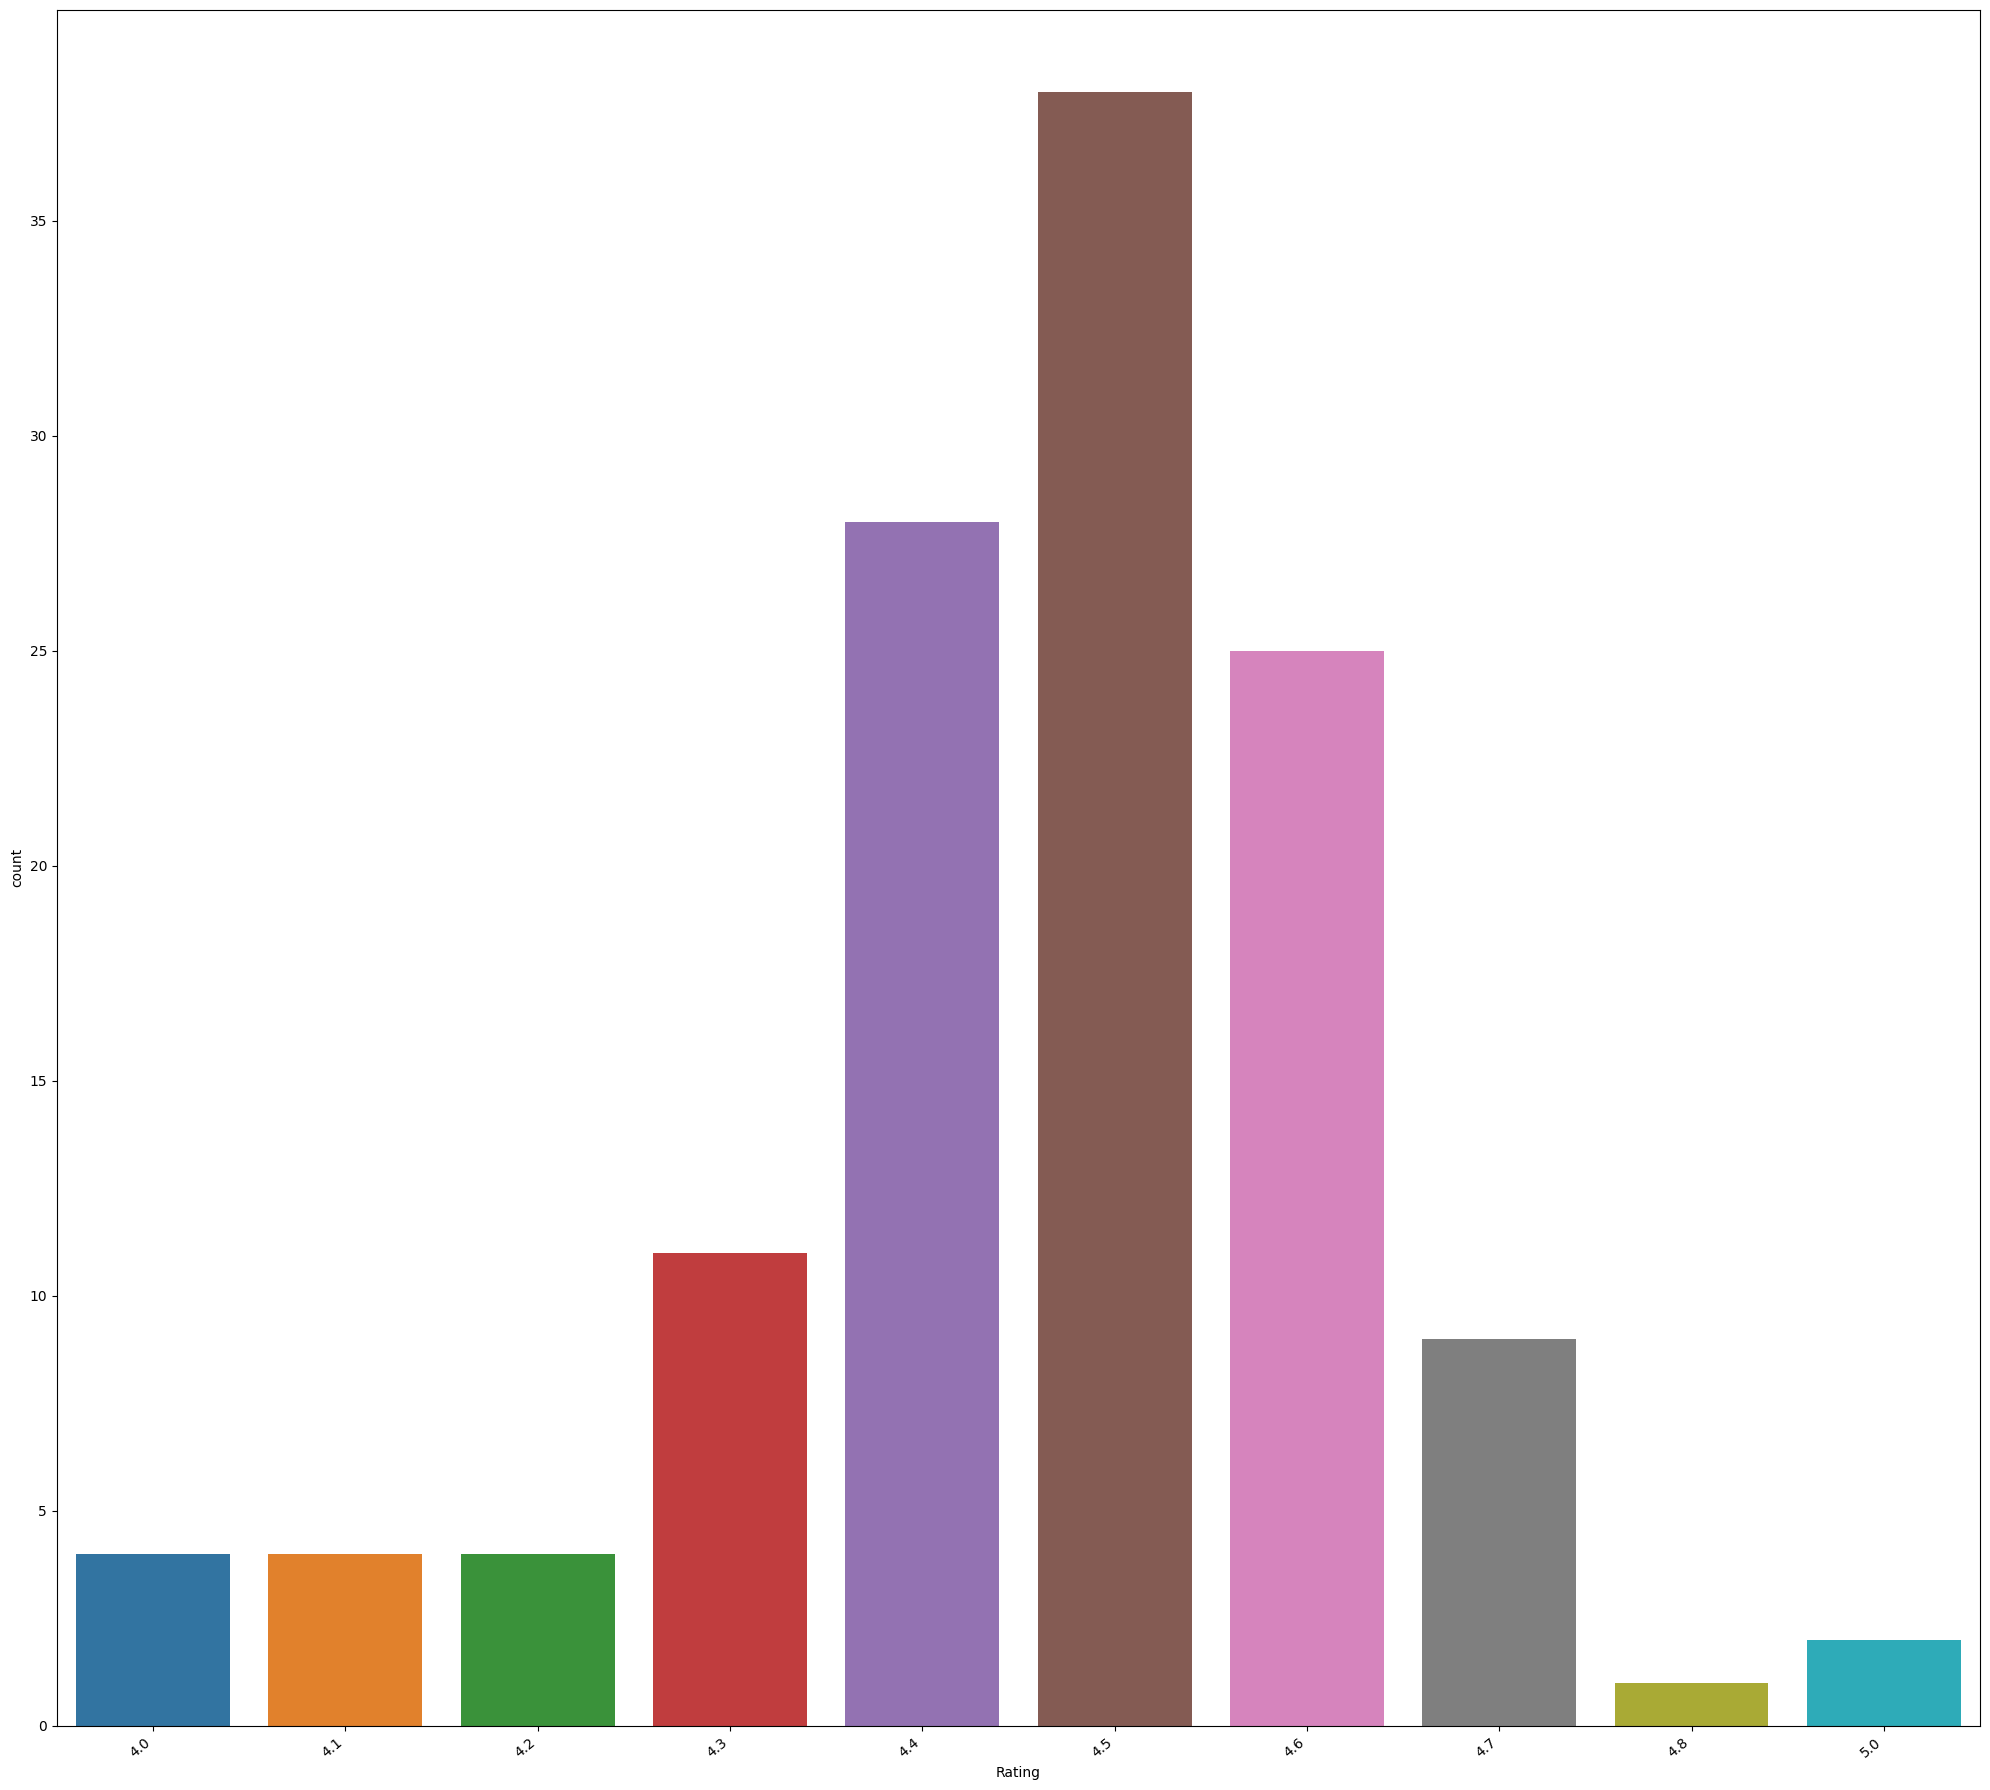

In [57]:
# using bar chart to see the rating of each place

plt.figure(figsize=(20,18))
ax = sns.countplot(df['Rating'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [58]:
df["Rating"].value_counts()

4.5    38
4.4    28
4.6    25
4.3    11
4.7     9
4.1     4
4.2     4
4.0     4
5.0     2
4.8     1
Name: Rating, dtype: int64

# Data Pre-Processing

In [59]:
from sklearn.preprocessing import LabelEncoder

# encode category data

le = LabelEncoder()

df['Category'] = le.fit_transform(df['Category'])

df.head(3)

,Place_Id,Place_Name,Description,Category,City,Price,Rating
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,4,Yogyakarta,6000,4.5
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,1,Yogyakarta,15000,4.6
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,4,Yogyakarta,20000,4.2


In [60]:
# because the data rating 

In [61]:
df['Category'].unique()

array([4, 1, 2, 0, 3])

In [62]:
df['Rating'].unique()


# how many unique value

print("There is {} unique rating in Yogyakarta city.".format(len(df['Rating'].unique())))

# sort data by rating

df = df.sort_values(by=['Rating'], ascending=False)

# show only the unique value
for i in df['Rating'].unique():
    print(i)



There is 10 unique rating in Yogyakarta city.
5.0
4.8
4.7
4.6
4.5
4.4
4.3
4.2
4.1
4.0


In [63]:
"""
I want to normalize df['Rating'] data so that the value is between 0 until 5 because the rating value is between 0 until 5. 

I want to change the label become like this:

4.0 , 4.1 ==> 1,
4.2, 4.3 ==> 2,
4.4, 4.5 ==> 3,
4.6, 4.7 ==> 4,
4.8, 4.9, 5.0 ==> 5
"""

# change the label

df['Rating'] = df['Rating'].replace([4.0, 4.1], 1)
df['Rating'] = df['Rating'].replace([4.2, 4.3], 2)
df['Rating'] = df['Rating'].replace([4.4, 4.5], 3)
df['Rating'] = df['Rating'].replace([4.6, 4.7], 4)
df['Rating'] = df['Rating'].replace([4.8, 4.9, 5.0], 5)


# convert data to int

df["Rating"] = df["Rating"].astype(int)

df


,Place_Id,Place_Name,Description,Category,City,Price,Rating
94,95,Desa Wisata Sungai Code Jogja Kota,"Kampung Code berada di Kelurahan Kotabaru, Kec...",4,Yogyakarta,0,5
123,124,Kauman Pakualaman Yogyakarta,Pakualaman adalah sebuah kecamatan di Kota Yog...,1,Yogyakarta,0,5
105,106,Kawasan Malioboro,Jalan Malioboro adalah nama salah satu kawasan...,4,Yogyakarta,0,5
138,139,Puncak Gunung Api Purba - Nglanggeran,Gunung Nglanggeran adalah sebuah gunung di Dae...,2,Yogyakarta,10000,4
174,175,Museum Ullen Sentalu,"Museum Ullen Sentalu, (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ꧀​ꦈ...",1,Yogyakarta,100000,4
...,...,...,...,...,...,...,...
181,182,Hutan Mangrove Kulon Progo,Di sini ada kawasan wisata Hutan Mangrove Kulo...,0,Yogyakarta,5000,1
134,135,Kawasan Wisata Sosrowijayan,Tempat wisata Sosrowijayan memang selama ini d...,3,Yogyakarta,0,1
152,153,Pantai Kukup,Pantai Kukup adalah salah satu pantai yang mem...,0,Yogyakarta,10000,1
100,101,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,1,Yogyakarta,0,1


# SELECT DATA TRAINING AND DATA TESTING

In [64]:
from sklearn.model_selection import train_test_split

feature = ["Category", "Price"]
label = ["Rating"]
# split data into train and test data

X_train, X_test, y_train, y_test = train_test_split(df[feature], df[label], test_size=0.2, random_state=42)



# create a neural network model

In [65]:


model = tf.keras.Sequential([

    layers.Dense(128, activation='relu', input_shape=[len(feature)]),

    layers.Dense(128, activation='relu'),

    layers.Dense(64, activation='relu'),

    layers.Dense(6, activation='softmax')

])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 6)                 390       
                                                                 
Total params: 25,542
Trainable params: 25,542
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
# set batch size ON 32

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 1s 133ms/step - loss: 968.5469 - accuracy: 0.1000 - val_loss: 275.4579 - val_accuracy: 0.5385
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 387.7471 - accuracy: 0.4700 - val_loss: 413.6285 - val_accuracy: 0.4231
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 323.0171 - accuracy: 0.3500 - val_loss: 190.0128 - val_accuracy: 0.5385
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 207.4421 - accuracy: 0.4500 - val_loss: 238.0662 - val_accuracy: 0.5385
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 297.1642 - accuracy: 0.5400 - val_loss: 270.8117 - val_accuracy: 0.4231
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 275.9790 - accuracy: 0.2900 - val_loss: 292.4741 - val_accuracy: 0.1538
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 311.8777 - accuracy: 0.1800 - val_loss: 242.7875 - val_accuracy

In [76]:
# test prediction

category_test = 2

price_test = 100000

prediction = model.predict([[category_test, price_test]])

print("The prediction is {}".format(np.argmax(prediction)))


# show all the destination place with rating 3

df[df['Rating'] == np.argmax(prediction)]

for i in df[df['Rating'] == np.argmax(prediction)]['Place_Name']:
    print(i)


The prediction is 4
Puncak Gunung Api Purba - Nglanggeran
Museum Ullen Sentalu
Pantai Timang
Bukit Paralayang, Watugupit
Candi Borobudur
Nol Kilometer Jl.Malioboro
Candi Prambanan
Tugu Pal Putih Jogja
Wisata Kraton Jogja
Museum Sonobudoyo Unit I
Pantai Ngobaran
Pantai Jungwok
Alun-alun Utara Keraton Yogyakarta
Bendung Lepen
Pantai Kesirat
Keraton Yogyakarta
Pantai Watu Kodok
Puncak Kebun Buah Mangunan
Pantai Greweng
Goa Jomblang
Seribu Batu Songgo Langit
Ledok Sambi
Gedung Agung Yogyakarta
Pantai Sadranan
Taman Sungai Mudal
Alun Alun Selatan Yogyakarta
Pantai Siung
Museum Benteng Vredeburg Yogyakarta
Bangsal Pagelaran
Kampung Wisata Taman Sari
Candi Ijo
Candi Sewu
Candi Ratu Boko
Monumen Serangan Umum 1 Maret
